# GAMP for mixtures of linear regressions

In [1]:
import sys
sys.path.append('../')

In [2]:
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt

from gamp.mlr import run_MLR_trial
from gamp.losses import B_loss

RNG = default_rng(1)

## Single trial

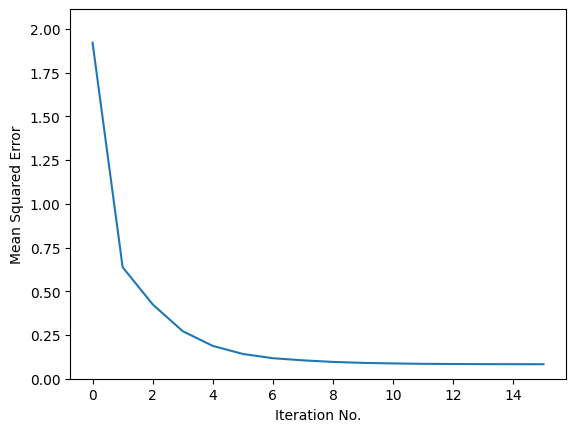

In [3]:
p = 500  # number of dimensions
L = 2  # number of mixture components
n = 2500  # number of samples
alpha = RNG.uniform(0, 0.1, L)
alpha = alpha / np.linalg.norm(alpha, 1)  # mixing proportions
sigma = 0.1  # noise variance
n_iters = 15  # number of AMP iterations
B, B_hat_list, M_k_B_list = run_MLR_trial(p, L, n, alpha, sigma, n_iters)
losses = [B_loss(B, B_hat) for B_hat in B_hat_list]
x = np.arange(0, len(B_hat_list))
plt.plot(x, losses)
plt.ylim(0, np.max(losses)*1.1)
plt.xlabel('Iteration No.')
plt.ylabel('Mean Squared Error')
plt.show()

## Varying delta

In [9]:
n_deltas = 9  # number of deltas to test
deltas = np.linspace(0.1, 7, n_deltas)
p = 500  # number of dimensions
L = 2  # number of mixture components
alpha = np.array([0.52, 0.48])  # mixing proportions
n_list = np.array(p * deltas, dtype=int)
sigma = 0.1  # noise variance
n_iters = 5  # number of AMP iterations
n_trials = 5  # number of trials to run

mse = np.zeros((n_trials, n_deltas))
for i, n in enumerate(n_list):
    print(n)
    for j in range(n_trials):
        B, B_hat_list, M_k_B_list = run_MLR_trial(p, L, n, alpha, sigma, n_iters)
        mse[j, i] = B_loss(B, B_hat_list[-1])
# plt.plot(deltas, mse)
# plt.ylim(0, np.max(mse)*1.1)
# plt.xlabel('delta')
# plt.ylabel('Mean Squared Error')
# plt.show()


50
481
912
1343
1775
2206
2637
3068
3500


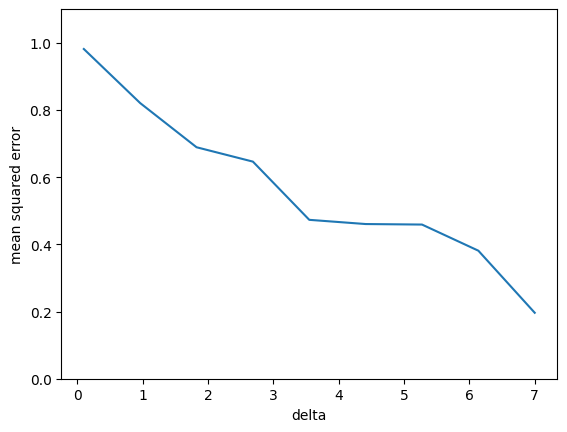

In [10]:
plt.plot(deltas, np.mean(mse, axis=0))
plt.xlabel("delta")
plt.ylabel("mean squared error")
plt.ylim(0, 1.1)
plt.show()